#### Importing Required Packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as ss
from scipy.stats import chi2_contingency
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
from sklearn.ensemble import RandomForestClassifier
# !pip install pycaret
from pycaret.regression import *

#### Importing the data

In [2]:
data=pd.read_csv("data/FannieAcq2000-19FMac30-sample2pt5.csv")
data.head()

,Unnamed: 0,loanIdentifier,origChannel,sellerName,origIntRate,origUPB,origDate,firstPmtDate,origLTV,origCLTV,...,pMIperct,mortInsType,bestCreditScore,worstCreditScore,avgCreditScore,fmacRate,fredRate,rateDiff,rateDiffPct,rank
0,5353740,832231376476,3,"GMAC MORTGAGE, LLC",5.875,242000,2007-01-01,2007-03-01,62.0,62.0,...,0.0,0.0,667.0,667.0,667.0,6.18,4.71,-0.305,-0.049353,3.0
1,4612284,877425485629,1,FIRST TENNESSEE BANK NATIONAL ASSOCIATION,4.875,168000,2005-03-01,2005-05-01,39.0,39.0,...,0.0,0.0,797.0,797.0,797.0,5.69,4.38,-0.815,-0.143234,2.0
2,7765258,191286475874,2,OTHER,4.375,556000,2011-11-01,2012-01-01,79.0,79.0,...,0.0,0.0,801.0,747.0,774.0,4.10,2.01,0.275,0.067073,3.0
3,4801103,788814542461,2,"BANK OF AMERICA, N.A.",6.500,112000,2005-08-01,2005-10-01,78.0,78.0,...,0.0,0.0,631.0,631.0,631.0,5.77,4.32,0.730,0.126516,4.0
4,3475269,173368078702,3,"IRWIN MORTGAGE, CORPORATION",5.250,220000,2003-08-01,2003-10-01,73.0,73.0,...,0.0,0.0,767.0,642.0,704.5,6.14,4.44,-0.890,-0.144951,2.0


In [3]:
data.rename(columns={'Unnamed: 0':'namedCol'}, inplace=True )

In [4]:
data.shape

(261615, 26)

In [5]:
# data = data.sample(frac=0.10)

In [6]:
#Checking for missing values
data.isnull().sum()

namedCol            0
loanIdentifier      0
origChannel         0
sellerName          0
origIntRate         0
origUPB             0
origDate            0
firstPmtDate        0
origLTV             0
origCLTV            0
numBorrowers        0
origDebtIncRatio    0
borrCreditScore     0
loanPurp            0
propState           0
zipCode             0
pMIperct            0
mortInsType         0
bestCreditScore     0
worstCreditScore    0
avgCreditScore      0
fmacRate            0
fredRate            0
rateDiff            0
rateDiffPct         0
rank                0
dtype: int64

In [7]:
#Checking datatypes of individual feature
data.dtypes

namedCol              int64
loanIdentifier        int64
origChannel           int64
sellerName           object
origIntRate         float64
origUPB               int64
origDate             object
firstPmtDate         object
origLTV             float64
origCLTV            float64
numBorrowers        float64
origDebtIncRatio    float64
borrCreditScore     float64
loanPurp              int64
propState            object
zipCode               int64
pMIperct            float64
mortInsType         float64
bestCreditScore     float64
worstCreditScore    float64
avgCreditScore      float64
fmacRate            float64
fredRate            float64
rateDiff            float64
rateDiffPct         float64
rank                float64
dtype: object

In [8]:
data['sellerName'] = data['sellerName'].astype('category')
data['propState'] = data['propState'].astype('category')

In [9]:
data['sellerNameCat'] = data['sellerName'].cat.codes
data['stateCat'] = data['propState'].cat.codes

In [10]:
data.dtypes

namedCol               int64
loanIdentifier         int64
origChannel            int64
sellerName          category
origIntRate          float64
origUPB                int64
origDate              object
firstPmtDate          object
origLTV              float64
origCLTV             float64
numBorrowers         float64
origDebtIncRatio     float64
borrCreditScore      float64
loanPurp               int64
propState           category
zipCode                int64
pMIperct             float64
mortInsType          float64
bestCreditScore      float64
worstCreditScore     float64
avgCreditScore       float64
fmacRate             float64
fredRate             float64
rateDiff             float64
rateDiffPct          float64
rank                 float64
sellerNameCat           int8
stateCat                int8
dtype: object

In [11]:
#Dropping features  not required in model building and prediction
data.drop(['origIntRate', 'namedCol', 'loanIdentifier', 'sellerName', 'firstPmtDate', 'propState', 'bestCreditScore', 'avgCreditScore'],1,inplace=True)

In [12]:
data.head()

,origChannel,origUPB,origDate,origLTV,origCLTV,numBorrowers,origDebtIncRatio,borrCreditScore,loanPurp,zipCode,pMIperct,mortInsType,worstCreditScore,fmacRate,fredRate,rateDiff,rateDiffPct,rank,sellerNameCat,stateCat
0,3,242000,2007-01-01,62.0,62.0,1.0,42.0,667.0,1,29,0.0,0.0,667.0,6.18,4.71,-0.305,-0.049353,3.0,32,41
1,1,168000,2005-03-01,39.0,39.0,1.0,21.0,797.0,2,967,0.0,0.0,797.0,5.69,4.38,-0.815,-0.143234,2.0,25,12
2,2,556000,2011-11-01,79.0,79.0,2.0,30.0,801.0,2,946,0.0,0.0,747.0,4.10,2.01,0.275,0.067073,3.0,54,4
3,2,112000,2005-08-01,78.0,78.0,1.0,18.0,631.0,1,184,0.0,0.0,631.0,5.77,4.32,0.730,0.126516,4.0,4,39
4,3,220000,2003-08-01,73.0,73.0,2.0,59.0,642.0,2,274,0.0,0.0,642.0,6.14,4.44,-0.890,-0.144951,2.0,40,28


### Chi-Square test for Feature Importance of Categorical Features

As majority of the features in the data are categorical, also the target feature is categorical we can use Chi-Square test for to get the feature importance.

In [13]:
def Chi_square(col_1,col_2):
    X=data[col_1].astype('str')
    Y=data[col_2].astype('str')
    observed_values=pd.crosstab(Y,X)
    chi2, p, dof, expected = ss.chi2_contingency(observed_values)
    if(p>0.05):
        print(col_1," is not required")
    else:
        print(col_1," is required")
        
for col in data:
    Chi_square(col,"rateDiffPct")

origChannel  is required
origUPB  is required
origDate  is required
origLTV  is required
origCLTV  is required
numBorrowers  is not required
origDebtIncRatio  is required
borrCreditScore  is required
loanPurp  is required
zipCode  is required
pMIperct  is required
mortInsType  is required
worstCreditScore  is required
fmacRate  is required
fredRate  is required
rateDiff  is required
rateDiffPct  is required
rank  is required
sellerNameCat  is required
stateCat  is required


### Feature Selection using Backward Elimination for Numerical Features

Using Backward Elimination method for numerical features

In [15]:
# X=data.drop(['rateDiffPct'],1)
# y=le.fit_transform(data["rateDiffPct"])

# import statsmodels.api as sm
# cols = list(X.columns)
# pmax = 1
# while (pmax>0.05):
#     p=[]
#     X_1 = X[cols]
#     X_1 = sm.add_constant(X_1)
#     model = sm.OLS(y,X_1).fit()
#     p = pd.Series(model.pvalues.values[1:],index = cols)      
#     pmax = max(p)
#     feature_with_p_max = p.idxmax()
#     if(pmax>0.05):
#         cols.remove(feature_with_p_max)
#     else:
#         breakselected_features_BE = cols
# print("Best features using Backward Elimination: ",cols)

### Feature Importance using Random Forest Classifier

Random Forest is considered to be one of the most unbiased model. As it creates multiple Decision Trees taking into account Random Features for each Decision Tree.

Because of this randomness the Random Forest Classifier considerd to be giving most unbiased Feature Importance

In [18]:
data2 = data

In [19]:
data2.drop(['origDate'],1,inplace=True)

In [20]:
X_rfc=data2.drop(["rateDiffPct"],1)
y_rfc=data2["rateDiffPct"]

In [22]:
# rfc=RandomForestClassifier(criterion='entropy',random_state=0,n_estimators=10)
# rfc.fit(X_rfc,y_rfc)

In [23]:
# plt.figure(figsize=(10,10))
# plt.barh(list(X_rfc),rfc.feature_importances_)
# plt.title("Feature Importance using Random Forest Classifier")
# plt.ylabel("Features")
# plt.xlabel('Feature Importance Value')

In [24]:
data.head()

,origChannel,origUPB,origLTV,origCLTV,numBorrowers,origDebtIncRatio,borrCreditScore,loanPurp,zipCode,pMIperct,mortInsType,worstCreditScore,fmacRate,fredRate,rateDiff,rateDiffPct,rank,sellerNameCat,stateCat
0,3,242000,62.0,62.0,1.0,42.0,667.0,1,29,0.0,0.0,667.0,6.18,4.71,-0.305,-0.049353,3.0,32,41
1,1,168000,39.0,39.0,1.0,21.0,797.0,2,967,0.0,0.0,797.0,5.69,4.38,-0.815,-0.143234,2.0,25,12
2,2,556000,79.0,79.0,2.0,30.0,801.0,2,946,0.0,0.0,747.0,4.10,2.01,0.275,0.067073,3.0,54,4
3,2,112000,78.0,78.0,1.0,18.0,631.0,1,184,0.0,0.0,631.0,5.77,4.32,0.730,0.126516,4.0,4,39
4,3,220000,73.0,73.0,2.0,59.0,642.0,2,274,0.0,0.0,642.0,6.14,4.44,-0.890,-0.144951,2.0,40,28


In [25]:
data.shape

(261615, 19)

### Model building using Pycaret Library

In [26]:
models=setup(data, target = 'rateDiffPct', categorical_features = ['origChannel','numBorrowers', 'loanPurp', 'mortInsType',
                                                                   'sellerNameCat', 'zipCode', 'stateCat', 'rank'])

 
Setup Succesfully Completed!


,Description,Value
0,session_id,342
1,Transform Target,False
2,Transform Target Method,None
3,Original Data,"(261615, 19)"
4,Missing Values,False
5,Numeric Features,10
6,Categorical Features,8
7,Ordinal Features,False
8,High Cardinality Features,False
9,High Cardinality Method,None


In [27]:
#blacklist the following next go-round: 'lar', 'lr', 'ransac', 'knn', 'par', 'huber', 'llar', 'en', 'lasso'
model_results=compare_models(blacklist = ['tr', 'svm'], fold = 5)
model_results

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Random Forest,0.0003,0,0.0019,0.9993,0.0015,0.0012
1,CatBoost Regressor,0.001,0,0.0023,0.999,0.0018,0.0026
2,Light Gradient Boosting Machine,0.001,0,0.0025,0.9988,0.002,0.003
3,Extra Trees Regressor,0.0002,0,0.0022,0.9988,0.0014,0.0008
4,Decision Tree,0.0004,0,0.0025,0.9988,0.002,0.0013
5,Gradient Boosting Regressor,0.0027,0,0.0039,0.9972,0.0035,0.0071
6,Extreme Gradient Boosting,0.0028,0,0.0041,0.997,0.0037,0.0067
7,AdaBoost Regressor,0.0094,0.0002,0.0125,0.9712,0.0113,0.0282
8,Orthogonal Matching Pursuit,0.0086,0.0002,0.0132,0.9676,0.0118,-0.0456
9,Bayesian Ridge,0.0087,0.0002,0.0133,0.9675,0.0118,-0.0441


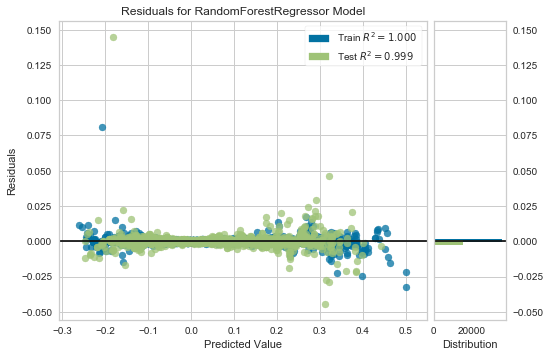

In [28]:
rf = create_model('rf')
plot_model(rf)